## Introduction to Data Science and Machine Learning

This introductory course is designed for beginners with little to no prior experience in **data science** and **machine learning (ML)**.  
However, a **basic understanding of Python syntax and statistics** is recommended.  

### 📘 Tutorial Overview

The Tutorial is divided into **three main sections**:

### 1. Data Pre-processing and Visualization
Learn essential techniques to prepare and understand data before modeling.  

**Topics include:**

**Data Pre-processing:**
- **Standard Scaling** – normalize data for consistent feature ranges.  
- **Principal Component Analysis (PCA)** – reduce dimensionality while retaining key information.  
- **Label Encoding** – convert categorical data into numerical form.  

**Data Visualization:**
- **Class distribution** - examine the balance between classes.
- **Feature Histograms** – explore the distribution of individual features.
- **Feature Bar charts** - compare scales of features.
- **PCA 2D Visualization** – visualize reduced-dimensional data to understand class separability and patterns.  

### 2. Model Training
Understand how to build and train ML model effectively.  

**Key concept:**
- **Grid Search Cross-Validation** – a parameter tuning method used to optimize model performance.
  
### 3. Model Evaluation
Assess model effectiveness using key performance metrics such as:
- **Accuracy**  
- **Confusion Matrix**

### 🎯 Learning Focus

The primary goal of this module is to teach you **how to effectively train and evaluate an ML model**. Rather than emphasizing mathematical theory, this course focuses on **hands-on implementation, visualization, and practical understanding** of the ML workflow.

In [2]:
### Python Libraries ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### Section 1: Data Pre-processing

Let's begin by exploring the dataset we’ll be working with. Developing a clear understanding of the data is crucial for making informed decisions about feature selection, model choice, and evaluation strategies.

In this tutorial, we will use the Dry Bean Classification Dataset, which contains 16 features and 7 distinct classes representing different bean types: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, and Sira. The features represent measurable properties of each bean (used as input variables for the model), while the classes correspond to the bean categories (the target labels we aim to predict).

For a detailed description of the dataset, including feature definitions and bean characteristics, you can visit https://archive.ics.uci.edu/dataset/602/dry+bean+dataset.

#### Step 1: Load and Read the Dataset

In [3]:
Dataset = pd.read_excel('data/Dry_Bean_Dataset.xlsx')        # Load the dataset into a pandas DataFrame [1]
print(Dataset)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.54981

#### Step 2: Check for missing values
Before we begin any data preprocessing or modeling, it’s important to check for missing values in the dataset. Missing data can negatively impact model performance and lead to biased or inaccurate predictions.  

By identifying missing values early, we can decide on an appropriate strategy to handle them — such as:
- Removing rows or columns with too many missing entries  
- Imputing values using statistical measures (mean, median, or mode)
- Using model-based imputation for more advanced cases  

In [4]:
# === Check for Missing Values ===
print("\nMissing values per column:")
print(Dataset.isnull().sum()) # Calculate and display the number of missing (NaN) values in each column of the dataset [2]


Missing values per column:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


#### Step 3: Feature and Target
In this step, we will divide the dataset into two parts:  
- **Features** – the independent variables used as inputs for the model.  
- **Target** – the dependent variable that the model will learn to predict.  

In classification problems, the terms **Target** and **Class** are often used interchangeably, but they have distinct meanings. **Target** refers to the actual label or output variable in the dataset (e.g., the bean type) whereas **Class** represents one of the possible categories or values that the target variable can take (e.g., *Seker*, *Barbunya*, *Bombay*, etc.).

In [5]:
#Separate features and target data
Target = Dataset['Class']                               # Extract target colum 'Class'
Features = Dataset.drop('Class', axis='columns')        # Only remove the target column [3]

#### Step 4: Visualizing class distribution

We create a pie chart to see the percentage of each class in the dataset. This helps us understand the distribution of the target variable and check for any class imbalance that might affect model performance. In this dataset, the classes are not perfectly equal. For example, **Bombay** and **Dermosan** have noticeable differences in their counts. However, the imbalance is mild and not expected to cause major issues.


Class Distribution:
Counter({'DERMASON': 3546, 'SIRA': 2636, 'SEKER': 2027, 'HOROZ': 1928, 'CALI': 1630, 'BARBUNYA': 1322, 'BOMBAY': 522})


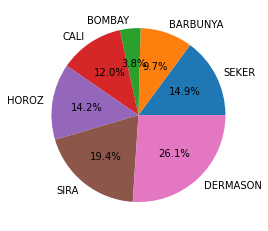

In [24]:
# === Summary Statistics ===
print("\nClass Distribution:")
print(Counter(Target))

# === Visualization === 
ClassDir = Counter(Target)                  # Counter calculates occurrences of each class [4]
y = np.array(list(ClassDir.values()))       # Converting ClassDir to NumPy array for plotting
labels = list(ClassDir.keys())              # Extract the class labels from the counter
plt.pie(y,                                  # Create a pie char [5]
        labels=labels, 
        autopct='%1.1f%%');     

#### Step 5.1: Visualizing Feature Distributions using Histograms

Histograms are a simple and effective way to visualize the distribution of individual features in a dataset. By plotting feature histograms, we can quickly identify skewness or symmetry in the data, detect outliers, and understand the range of values for each feature. This information is valuable for making preprocessing decisions such as scaling, normalization, or transformation. In the histograms shown:
- Features like **Area** and **ConvexArea** are left-skewed, indicating many small values and few large ones.
- **Solidity** and **ShapeFactor4** have highly concentrated distributions near 1, suggesting low variability.
- **AspectRatio** and **Eccentricity** appear closer to normal distributions, which may make them better-behaved features for certain machine learning models.


<Figure size 864x432 with 0 Axes>

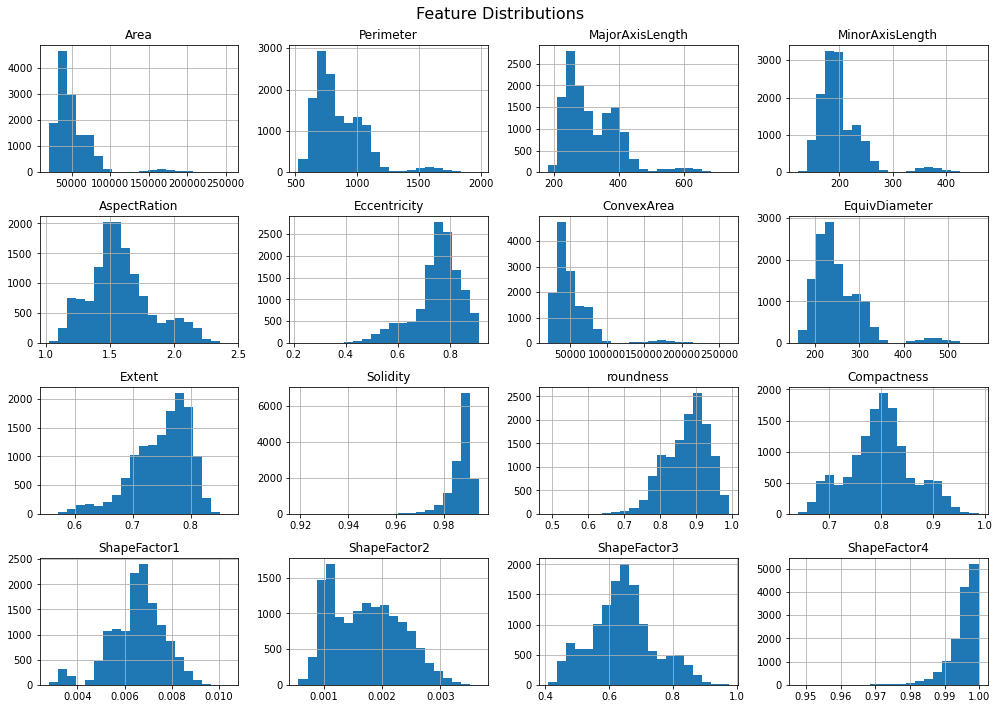

In [7]:
# --- Feature Distribution ---
plt.figure(figsize=(12, 6))    # Create a figure with specified size
Dataset.drop("Class", axis=1).hist(bins=20, figsize=(14, 10))   # Plot histograms for all features except the target column 'Class' [6]
plt.suptitle("Feature Distributions", fontsize=16)   # Add a title for the entire plot
plt.tight_layout()   # Adjust layout to prevent overlap of subplots
plt.show()  # Display the plot

#### Step 5.2: Visualizing Features using Bar chart
Another approach to visualizing features is to use a horizontal bar chart to display the mean values of each feature in the dataset. This type of visualization allows for easy comparison of feature scales and helps identify which features may require data preprocessing, such as normalization or standardization, before applying machine learning algorithms.

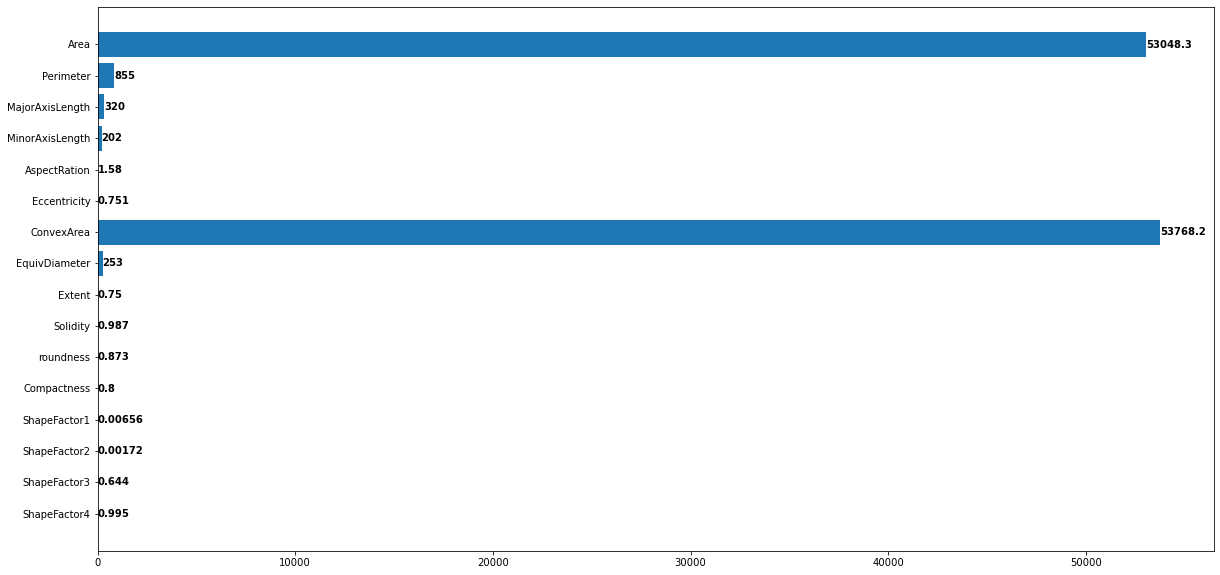

In [8]:
# --- Visualization before scaling ---
FeatureMean = Features.mean().to_dict()                          # Create a dictionary with features as keys and their means as values
fig, ax = plt.subplots(figsize=(20,10))                             # Create a horizontal bar chart with a figure size of 20x10
ax.barh(list(FeatureMean.keys()), list(FeatureMean.values()))       # Plot the feature names on the y-axis and their mean values on the x-axis
ax.invert_yaxis()                                                   # Invert the y-axis so that the bars are ordered from top to bottom
for values in ax.patches:
    plt.text(                                                       # Add labels to each bar in the chart
             s=f'{values.get_width():.3g}' if        
             values.get_width()            
             < 1000 else f'{values.get_width():.6g}',
             x=values.get_width(),
             y=values.get_y()+0.5,
             fontsize=10,
             fontweight ='bold')

#### Step 6: Applying StandardScaler

As shown in the image above, features such as **ConvexArea**, **Area** and **Solidity** vary greatly in magnitude, with **ConvexArea** and **Area** in the thousands and **Solidity** in decimals. This disparity can cause the model to give undue weight to features with larger values. To mitigate this, we apply the StandardScaler to normalize the data, bringing all features onto the same scale and allowing the model to treat each feature equally for unbiased predictions.

In [9]:
scaler = StandardScaler()
SSFeatures = scaler.fit_transform(Features)                           # Apply the scaler to the feature data and transform it to standardized values
SSFeatures = pd.DataFrame(SSFeatures, columns=Features.columns)        # Converting to pandas dataframe

#### Step 7: Visualize Features After Standard Scaling

After generating the bar chart using the cell below, you will notice that the means of all features have shifted significantly. Their magnitudes are now centered around zero, with some features that previously had positive values now appearing negative. This occurs because the StandardScaler rescales each feature by subtracting its mean and dividing by its standard deviation, which can result in some feature means becoming negative.

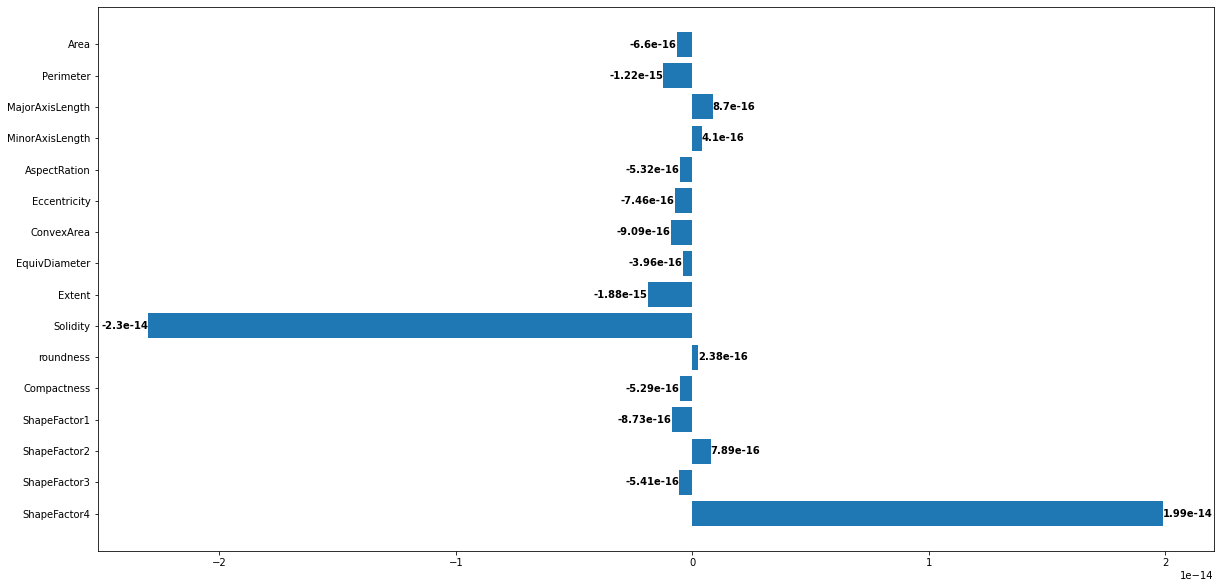

In [10]:
# --- Visualize after Standard Scaling ---
FeatureMean = SSFeatures.mean().to_dict()                        # Create a dictionary with features as keys and their means as  [7]
fig, ax = plt.subplots(figsize=(20,10))                             # Create a horizontal bar chart with a figure size of 20x10
ax.barh(list(FeatureMean.keys()), list(FeatureMean.values()))       # Plot the feature names on the y-axis and their mean values on the x-axis 
ax.invert_yaxis()                                                   # Invert the y-axis so that the bars are ordered from top to bottom 
for values in ax.patches:
    plt.text(s=f'{values.get_width():.3g}',                         # Add labels to each bar in the chart [8]
             x=values.get_width(),
             y=values.get_y()+0.5,
             fontsize=10,
             fontweight ='bold',
             ha='right' if values.get_width() < 0 else 'left')

#### Step 8: Apply Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique that helps lower the risk of overfitting and speeds up model training. Overfitting occurs when a model performs well on training data but poorly on test data, often because it captures noise or irrelevant patterns from an excessive number of features. PCA identifies the essential structure in the data, reducing the number of features while preserving the information needed for accurate predictions.

#### Step 9: Visualize Feature Correlation before PCA

The code below generates a heatmap showing the linear relationships between features in the dataset. Correlations range from -1 to 1: values near 1 indicate a strong positive correlation (both features increase together), values near -1 indicate a strong negative correlation (one feature increases while the other decreases), and values near 0 suggest little to no linear relationship. Ideally, features should have correlations close to zero, ensuring each contributes unique information to the model and reducing redundancy.

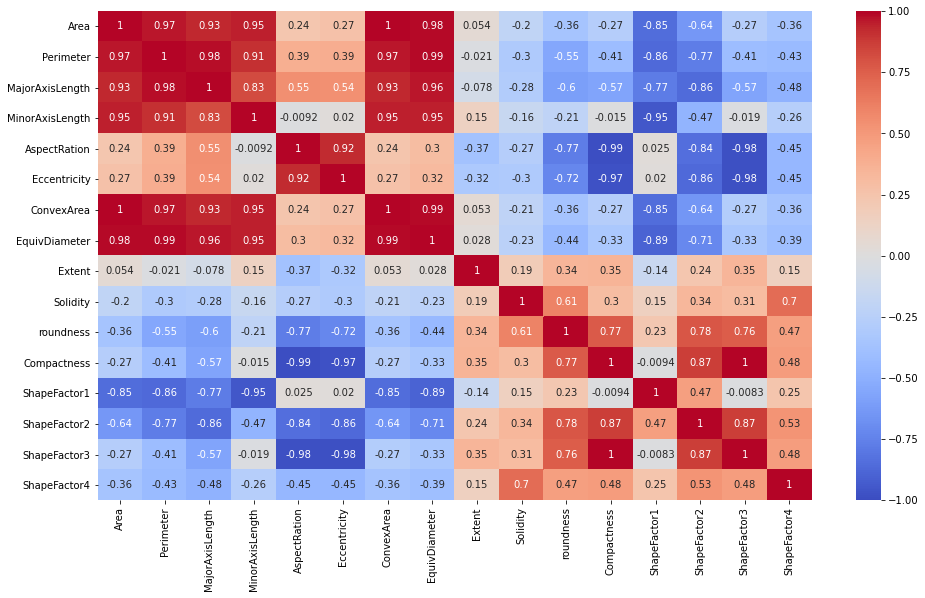

In [11]:
plt.figure(figsize=(16, 9))             # Create a figure with a specified size of 16x9 for the heatmap
sns.heatmap(SSFeatures.corr(),       # Plot a heatmap of the correlation matrix for the standardized feature data [9]
            cmap='coolwarm', 
            annot=True, 
            vmin=-1, 
            vmax=1)
plt.show()                              # Display the heatmap

#### Step 9: Apply PCA

We set n_components=8 in the PCA function to reduce the input data to 8 principal components, capturing the most significant variance in the dataset. These components are derived from the covariance matrix, with each principal component being a linear combination of the original features, weighted according to the variance it explains. The choice of 8 components is based on balancing dimensionality reduction with information retention; it was selected through trial and error to retain sufficient variance for accurate modeling. The value of n_components can be adjusted depending on the dataset and the desired trade-off between reducing complexity and preserving information.

After applying PCA, we check the explained variance of the components. High explained variance (typically above 90%) indicates that the selected principal components capture most of the dataset’s information, preserving variability while reducing noise. If the explained variance is low (below 60%), it suggests the data may have complex or nonlinear relationships that linear PCA cannot capture effectively, in which case methods like Kernel PCA or t-SNE could provide a better representation.

In [17]:
PCAnalysis = PCA(n_components=8)                                    # Initialize PCA to reduce the data to 8 principal components
SSAndPCAFeatureData = PCAnalysis.fit_transform(SSFeatures)          # Fit and transform the standardized feature data using PCA, reducing dimensionality [10]
print("Total Variance Explained:", np.sum(PCAnalysis.explained_variance_ratio_))

Total Variance Explained: 0.9992984338041785


#### Step 10: Visualize Feature Correlation After PCA

After generating the heatmap below, you will notice that, aside from the diagonal (which contains 1s and can be ignored), all other values are close to 0. This indicates that redundant features have been removed, as the principal components are now uncorrelated and capture unique information from the dataset.

In [ ]:
plt.figure(figsize=(16, 9))                                 # Create a figure with a specified size of 16x9 for the heatmap
sns.heatmap(pd.DataFrame(SSAndPCAFeatureData).corr(),       # Plot a heatmap of the correlation matrix for the standardized feature data [9]
            cmap='coolwarm', 
            annot=True, 
            vmin=-1, 
            vmax=1)
plt.show()  

#### Step 11: Visualizing 2D PCA

The PCA 2D plot visualizes the dataset using the first two principal components, which in our case capture 81% of the total variance, retaining most of the meaningful information from the original features. This plot is useful for understanding class separability, as it reveals whether different classes form distinct clusters, identifying patterns or outliers, and visually validating that the dimensionality reduction preserves the majority of the dataset’s information.

Total Variance Explained: 0.8189741179133923


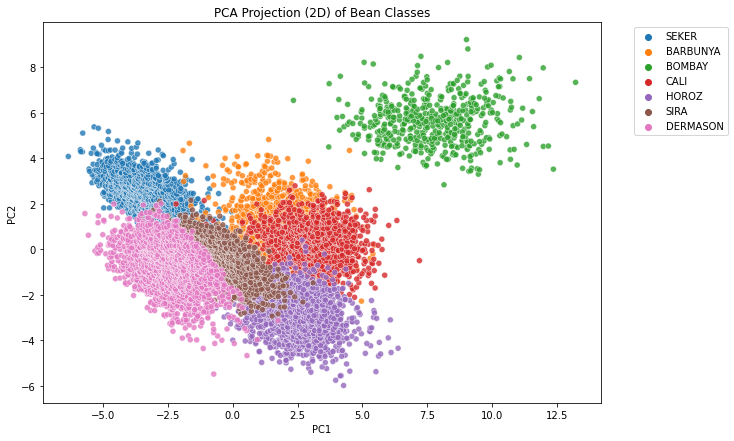

In [15]:
pca = PCA(n_components=2)   # Initialize PCA to reduce the data to 2 principal components
X_pca = pca.fit_transform(SSFeatures) # Fit and transform the standardized feature data using PCA, reducing dimensionality [10]
print("Total Variance Explained:", np.sum(pca.explained_variance_ratio_))

# === Plot the data === #
plt.figure(figsize=(10, 7))   # Create a figure with specified size

sns.scatterplot(    # Create a scatter plot of the first two principal components from PCA [11]
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=Dataset["Class"],
    palette="tab10", alpha=0.8
)
plt.title("PCA Projection (2D) of Bean Classes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

#### Step 12: Encoding the labels

The Label Encoder converts text labels into numeric values, which is essential because many machine learning models require numeric input. After running the code below, each text label is assigned a number — for example, Sira becomes 6 and Cali becomes 2, allowing the model to process the labels correctly.

In [19]:
Encoder = LabelEncoder()                                # Initialize a LabelEncoder to convert categorical target labels into numeric values
Encoded_Target = Encoder.fit_transform(Target)        # Fit the encoder to the target data and transform the labels into numeric values [12]
for Idx, LabelName in enumerate(Encoder.classes_):      
    print(f'{LabelName}: {Idx}')

BARBUNYA: 0
BOMBAY: 1
CALI: 2
DERMASON: 3
HOROZ: 4
SEKER: 5
SIRA: 6


## Section 2: Model Training

#### Step 13: Split the dataset into train and test sets

Using the train_test_split function, we divide the data into training and testing sets. This allows us to evaluate the model’s performance on unseen data, simulating real-world scenarios. By setting test_size=0.3, 30% of the data is reserved for testing, while 70% is used for training. The random_state=42 ensures consistent shuffling of the data for reproducibility, which helps prevent the model from learning unintended patterns based on the order of the data.

In [20]:
xTrain, xTest, yTrain, yTest = train_test_split(SSAndPCAFeatureData, Encoded_Target, test_size=0.3, random_state=42) #[13]

#### Step 14: Initialize the Model

In this tutorial, we train a Support Vector Classifier (SVC), a powerful algorithm from the Support Vector Machine (SVM) family. SVC can handle both linear and non-linear data, making it versatile for a wide range of classification tasks. The model works by finding the optimal hyperplane that separates different classes in the dataset, aiming to maximize the margin between them. This maximized margin helps improve the model’s generalization and prediction accuracy on unseen data.

In [21]:
#Inittialize the Model
Model = svm.SVC() #[14]

#### Step 15: Parameter Search

The svm.SVC() function includes many parameters—such as C, kernel, gamma, and degree—and finding the optimal combination is not straightforward. There is no formula to determine the best values, so it usually requires trial and error. Manually tuning these parameters can be time-consuming, which is where Grid Search becomes valuable. As shown in the code below, we specify a range of values for parameters like C and kernel and use GridSearchCV to automatically evaluate all possible combinations. This streamlines the tuning process and helps identify the parameter set that maximizes model performance.

In [22]:
# 'kernel': Specifies the type of kernel to use in SVC.
# 'linear' is for linearly separable data, while 'poly', 'rbf', and 'sigmoid' handle non-linear data.

# 'C': Regularization parameter that controls the trade-off between achieving low training error and maintaining good generalization.
# A smaller C encourages a wider margin and more regularization, potentially allowing some misclassifications but improving generalization.
# A larger C tries to classify all training examples correctly, which may lead to overfitting.

ParameterGrid = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 
    'C':[0.1, 1, 3, 5, 8] 
}

# Model: The machine learning model to tune (e.g., SVC)
# ParameterGrid: The hyperparameter grid defined earlier
# verbose: verbose=4 provides detailed progress updates during the search 
GridSearch = GridSearchCV(Model, ParameterGrid, verbose=4) #[15]

# Fits dataset parameters
GridSearch.fit(xTrain, yTrain)

print("Best Model Parameters: ", GridSearch.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...........................C=0.1, kernel=linear; total time=   0.2s
[CV 2/5] END ...........................C=0.1, kernel=linear; total time=   0.2s
[CV 3/5] END ...........................C=0.1, kernel=linear; total time=   0.2s
[CV 4/5] END ...........................C=0.1, kernel=linear; total time=   0.2s
[CV 5/5] END ...........................C=0.1, kernel=linear; total time=   0.2s
[CV 1/5] END .............................C=0.1, kernel=poly; total time=   0.7s
[CV 2/5] END .............................C=0.1, kernel=poly; total time=   0.7s
[CV 3/5] END .............................C=0.1, kernel=poly; total time=   0.7s
[CV 4/5] END .............................C=0.1, kernel=poly; total time=   0.7s
[CV 5/5] END .............................C=0.1, kernel=poly; total time=   0.7s
[CV 1/5] END ..............................C=0.1, kernel=rbf; total time=   0.8s
[CV 2/5] END ..............................C=0.

The best parameters found are C=8 and kernel='rbf'. GridSearchCV uses 5-fold cross-validation (CV), which means the dataset is split into 5 equal parts (folds). The model is trained on 4 folds and tested on the remaining fold, and this process is repeated 5 times so that each fold serves as the test set once. The mean score across all 5 folds is calculated for each parameter combination. The combination with the highest mean test score is selected as the best. The code below prints the mean score for each combination, showing that C=8 and kernel='rbf' achieve the highest performance.

In [25]:
for score, params in zip(GridSearch.cv_results_['mean_test_score'], GridSearch.cv_results_['params']):      # Visualize the mean test scores and their corresponding parameters [16]
    print(f"C={params['C']:<6} | kernel={ params['kernel']:<8} | {score:.10f}")

C=0.1    | kernel=linear   | 0.9253694233
C=0.1    | kernel=poly     | 0.8597668366
C=0.1    | kernel=rbf      | 0.9219058478
C=0.1    | kernel=sigmoid  | 0.8197752642
C=1      | kernel=linear   | 0.9258941924
C=1      | kernel=poly     | 0.9054259377
C=1      | kernel=rbf      | 0.9267339772
C=1      | kernel=sigmoid  | 0.7305558631
C=3      | kernel=linear   | 0.9259994547
C=3      | kernel=poly     | 0.9155028601
C=3      | kernel=rbf      | 0.9278885024
C=3      | kernel=sigmoid  | 0.7188003624
C=5      | kernel=linear   | 0.9257894258
C=5      | kernel=poly     | 0.9177076396
C=5      | kernel=rbf      | 0.9288331640
C=5      | kernel=sigmoid  | 0.7168060524
C=8      | kernel=linear   | 0.9254745754
C=8      | kernel=poly     | 0.9195968526
C=8      | kernel=rbf      | 0.9292531665
C=8      | kernel=sigmoid  | 0.7136568868


## Section 3: Model Evaluation

#### Step 16: Calculate Accuracy

We evaluate the model using accuracy on the test data, which measures the proportion of correct predictions out of the total predictions made. This metric provides a straightforward way to assess the model’s performance, indicating the percentage of correctly classified instances.

In [27]:
#Calculate Accuracy
BestModel = GridSearch.best_estimator_                      # Retrieve the best model from the grid search [15]
Predictions = BestModel.predict(xTest)                      # Use the best model to make predictions on the test data
Predictions = Encoder.inverse_transform(Predictions)        # Convert the predicted numeric labels back to their original categorical form 
yTest = Encoder.inverse_transform(yTest)                    # Convert the true test labels back to their original categorical form [14]
Accuracy = accuracy_score(Predictions, yTest)               # Calculate the accuracy by comparing predictions with the true test labels [15]
print("Model Accuracy: ", Accuracy)

Model Accuracy:  0.9351126346718903


#### Step 17: Generate Confusion Matrix

A confusion matrix evaluates a classification model by directly comparing the true labels to the predicted labels. It not only highlights the number of correct predictions but also reveals specific misclassifications, providing a clear and detailed view of the model’s performance and helping identify areas that may need improvement.

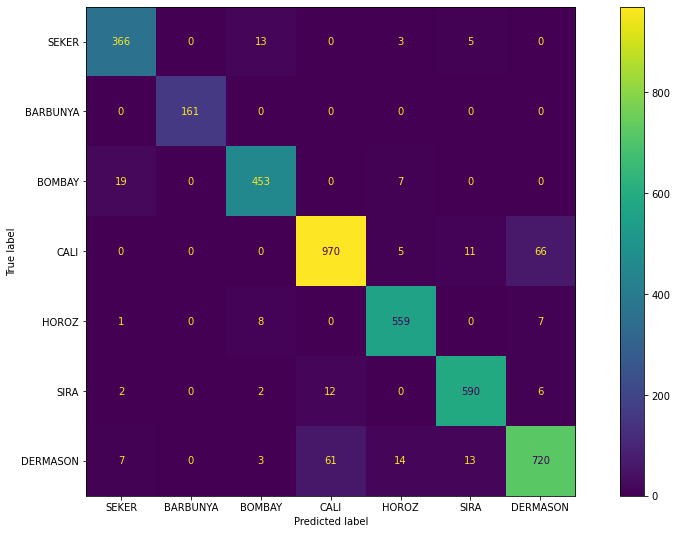

In [28]:
ConfusionMatrix = confusion_matrix(Predictions, yTest)      # Generate the confusion matrix by comparing predictions with the true test labels
Display = ConfusionMatrixDisplay(ConfusionMatrix,           # Create a confusion matrix display with the original class labels [16]
                                 display_labels=labels)          
Fig, Ax = plt.subplots(figsize=(16, 9))                     # Create a figure with a specified size of 16x9 for the confusion matrix plot
Display.plot(ax=Ax);   

## Hands-on Exercise

## Question 1:
Using the Beans dataset, adjust the value of C in the SVC model and visualize the resulting accuracy scores. Observe how the model’s performance changes as C increases or decreases, and determine whether there is a value of C that yields better accuracy than C=8.

## Question 2
Perform a similar analysis on the Breast Cancer Detection dataset.

#### References

[1] https://www.geeksforgeeks.org/reading-excel-file-using-python/ <br>
[2] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html <br>
[3] https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe <br>
[4] https://www.geeksforgeeks.org/python-counter-objects-elements/ <br>
[5] https://www.w3schools.com/python/matplotlib_pie_charts.asp <br>
[6] https://www.geeksforgeeks.org/data-visualization/plotting-histogram-in-python-using-matplotlib/ <br>
[7] https://stackoverflow.com/questions/31037298/pandas-get-column-average-mean <br>
[8] https://www.geeksforgeeks.org/bar-plot-in-matplotlib/ <br>
[9] https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/ <br>
[10] https://www.geeksforgeeks.org/principal-component-analysis-with-python/ <br>
[11] https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html/ <br>
[12] https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/ <br>
[13] https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/ <br>
[14] https://scikit-learn.org/dev/modules/generated/sklearn.svm.SVC.html <br>
[15] https://www.geeksforgeeks.org/daskgridsearchcv-a-competitor-for-gridsearchcv/ <br>
[16] https://stackoverflow.com/questions/63584320/print-parameters-and-scores-gridsearchcv <br>
[17] https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html <br>
[18] https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.accuracy_score.html <br>
[19] https://www.w3schools.com/python/python_ml_confusion_matrix.asp <br>
[20] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html <br>
[21] https://archive.ics.uci.edu/dataset/602/dry+bean+dataset <br>
[22] https://www.semanticscholar.org/paper/Multiclass-classification-of-dry-beans-using-vision-Koklu-Özkan/e84c31138f2f261d15517d6b6bb8922c3fe597a1

#### Authors
1) Nrushad Joshi (ntj@ornl.gov)
2) Shivangi Gupta (s1gupta@odu.edu)
3) Suzanne T Parete-Koon (paretekoonst@ornl.gov)
4) Michael A Sandoval
5) Christopher B Fuson